## Predicting heart Disease using machine learning
ml and dl based libraries->whether or not heart disease

*Steps:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

#### 1. Problem Definition:
The given parameter are about different patients and we have to predict if they have heart disease or not?

#### 2.Data
The data originates from the Cleveland data from the UCI Machine Learning Repository.
We've downloaded from it's another version from Kaggle.com
Site Link: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/code

#### 3. Evaluation
I'm aiming to run this model on an accuracy of more than 95% and modify it better related to the future outcomes

#### Features:
Data Dictionary: Different features of our dataset 
    
1. `age`: Age of the patient (int64)
2. `sex`: Gender of the patient (int64)
3. `cp`: Chest pain type (int64)
4. `trestbps`: Resting blood pressure (int64)
5. `chol`: Serum cholesterol (int64)
6. `fbs`: Fasting blood sugar level (int64)
7. `restecg`: Resting electrocardiographic results (int64)
8. `thalach`: Maximum heart rate achieved (int64)
9. `exang`: Exercise-induced angina (int64)
10. `oldpeak`: ST depression induced by exercise relative to rest (float64)
11. `slope`: The slope of the peak exercise ST segment (int64)
12. `ca`: Number of major vessels colored by fluoroscopy (int64)
13. `thal`: Thalassemia (int64)
14. `target`: The predicted attribute (int64)

In [68]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [69]:
streamlit nbconvert nd-to-end-heart-disease-classification.ipynb


SyntaxError: invalid syntax (2842118441.py, line 1)

### Preparing the tools
Libraries used:

1. pandas
2. Matplotlib
3. Numpy
4. Seaborn

In [2]:
import sklearn
print(sklearn.__version__)


1.3.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#plots inside the nbk
%matplotlib inline 

# Sklearn Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve


In [4]:
# Loading the data
df = pd.read_csv("C:\\Users\\KIIT\\Desktop\\Data Science\\udemy\\Project 1\\heart-disease (1).csv")
df.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
df.shape

(303, 14)

#### Data Exploration-> understanding our data features and properties


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
# TARGET: 0 - no heart Disease; 1 - heart Disease
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

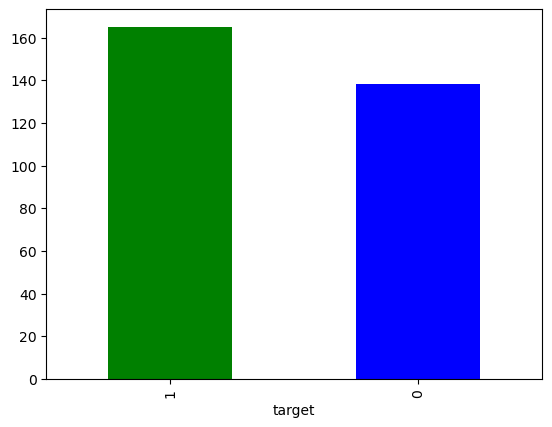

In [9]:
# ploting on a bar graph
df['target'].value_counts().plot(kind="bar", color={'blue', 'green'});

In [10]:
# information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
# Missing values check
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
# Heart Disease gender Distribution -> 1:Male, 2:Female
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [14]:
# Sex vs target
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


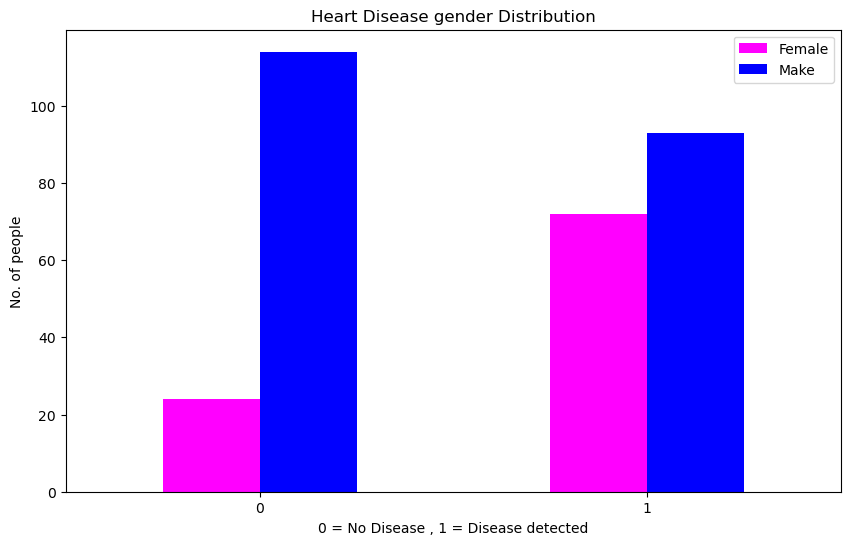

In [15]:
# plotting
pd.crosstab(df.target, df.sex).plot(kind = 'bar', figsize=(10, 6), color=['magenta', 'blue'])

plt.title("Heart Disease gender Distribution")
plt.xlabel("0 = No Disease , 1 = Disease detected")
plt.ylabel("No. of people")
plt.legend(["Female", "Make"]);
plt.xticks(rotation=0);

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Age vs Max Heart rate for Heart Disease

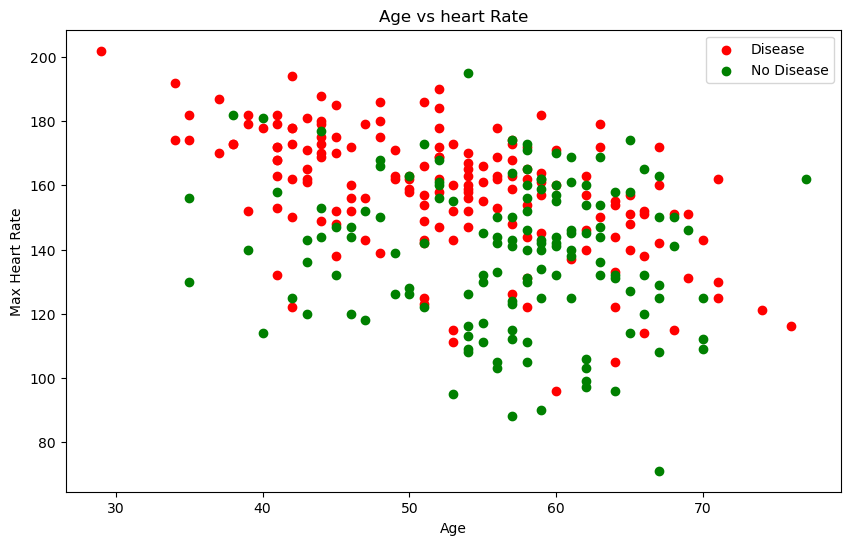

In [17]:
plt.figure(figsize=(10,6))

# positive
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color='red');

# negative-0
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color='green');

plt.title("Age vs heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", 'No Disease']);

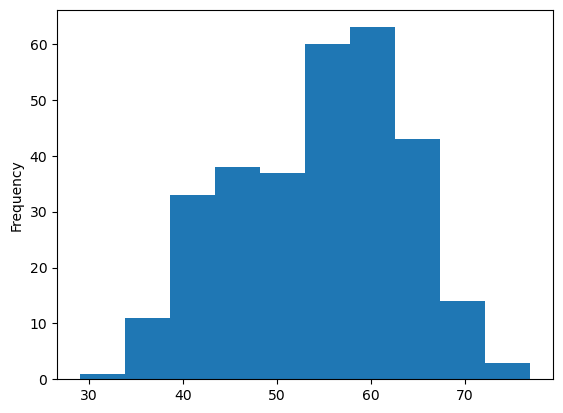

In [18]:
# Age Distribution
df.age.plot.hist();

#### heart Disease freq vs Chest pain
1. **Typical Angina:** Chest pain during activity, relieved by rest or nitroglycerin.
2. **Atypical Angina:** Varied chest discomfort not fitting typical patterns.
3. **Anginal Equivalent:** Non-pain symptoms signaling insufficient heart blood flow.
4. **Asymptomatic:** No noticeable symptoms, common in certain heart conditions.

In [19]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


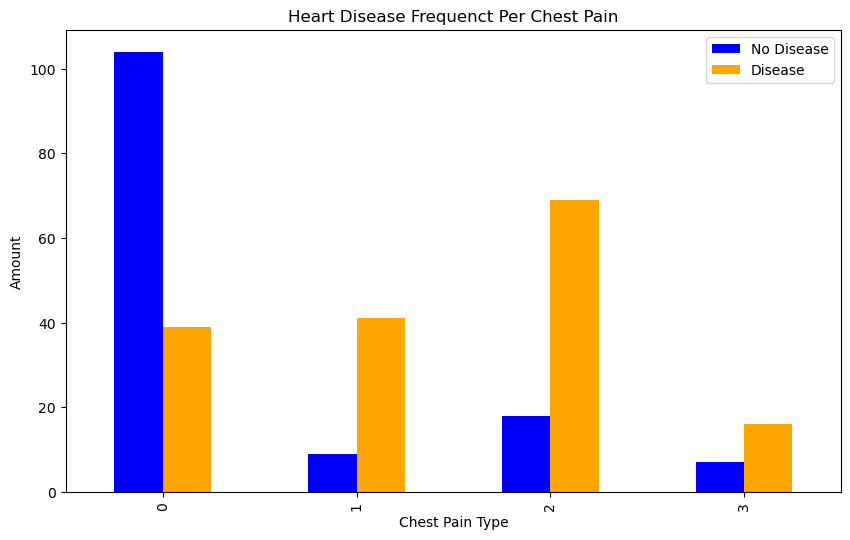

In [20]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6),color=["blue","orange"])

plt.title("Heart Disease Frequenct Per Chest Pain")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"]);

In [21]:
# Correlation
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


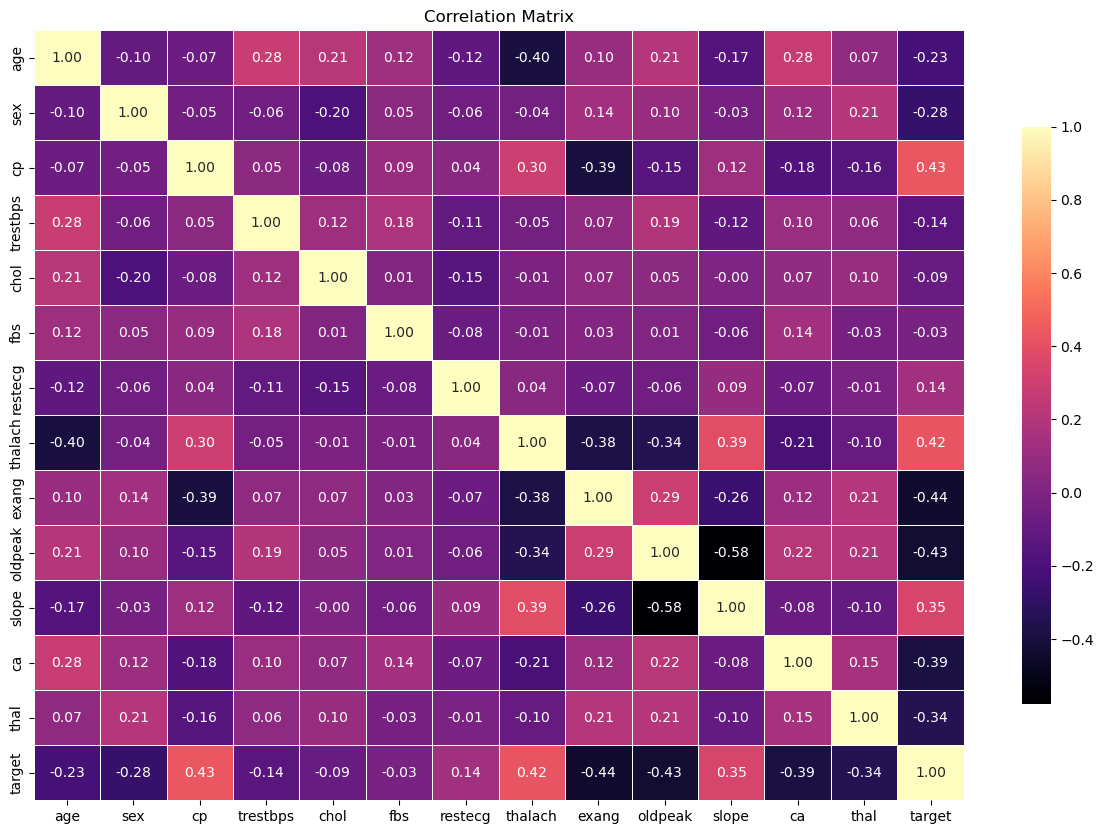

In [22]:


# Calculate correlation matrix
co_matrix = df.corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(co_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="magma",
            cbar_kws={"shrink": 0.75})  # Adjust colorbar size if needed

# Set title
plt.title("Correlation Matrix")

# Show the plot
plt.show()


### 5.Modelling

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# Data splitting in X and y
X = df.drop("target", axis = 1)
y = df["target"]

In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [26]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [27]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [28]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [29]:
len(X_train), len(y_train)

(242, 242)

In [30]:
df.shape

(303, 14)

### Models used:
    
    1. LogisticRegression
    2. KNeighborsClassifier
    3. RandomForestClassifier

In [31]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [32]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

#### Comparison
##### Baseline Model Created

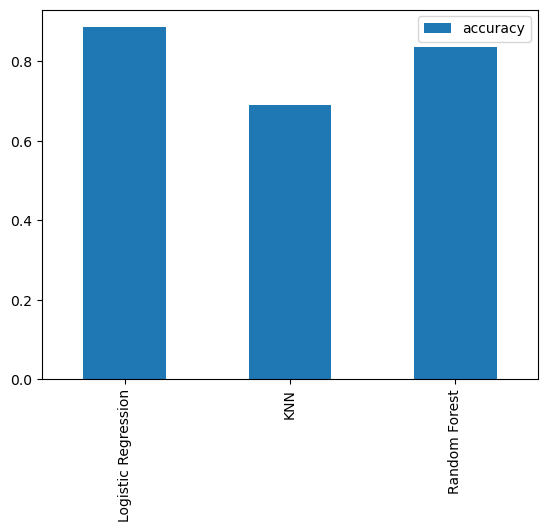

In [33]:
# Transposing for better output
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

KNN eliminated(KNeighborsClassifier)

## Analysis Parameter

* Hypyterparameter tuning
    * by hand
    * RandomizedSearchCV
    * GridSearchCV
* Feature importance
* Confusion Matrix 
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC Curve
* Area under the curve(AUC)

### Hyperparameter tuning

In [34]:
# tuning KNN

train_scores = []
test_scores = []

# values of neighbours
neighbors = range(1, 21)

knn = KNeighborsClassifier()

# loop
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
#     fit
    knn.fit(X_train, y_train)
#     training scores list
    train_scores.append(knn.score(X_train, y_train))
#     test scores list
    test_scores.append(knn.score(X_test, y_test))

In [35]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [36]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max KNN scores on test data: 75.41


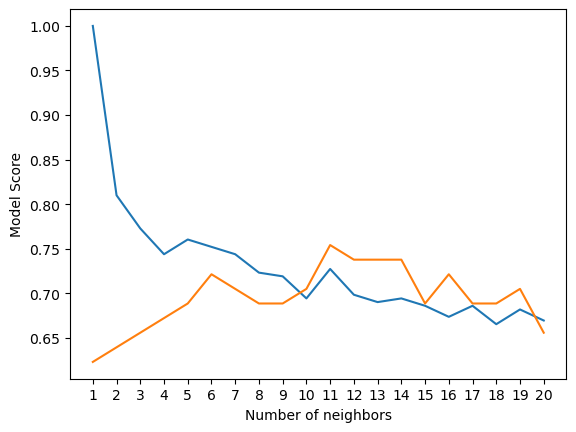

In [37]:
plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")

print(f"Max KNN scores on test data: {max(test_scores)*100:.2f}")

#### Hyperparameter tuning with RandomizedSearchCV
(Cross Validation)
* LogisticRegression()
* RandomForestClassifier()

In [38]:
# Hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4, 20),
               "solver": ["liblinear"]}

# Hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}


Tuning both the model using RandomizedSearchCV

In [39]:
# LogisticFRegression
np.random.seed(88)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose=True)
# fit
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [40]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [41]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [42]:
## RandomForestClassifier
np.random.seed(88)

rs_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rf_grid,  
    n_iter=20,
    verbose=1
)

# fitting
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=1)

In [43]:
# best hyperparameters
rs_rf.best_params_

{'n_estimators': 660,
 'min_samples_split': 14,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [44]:
# scores
rs_rf.score(X_test, y_test)

0.8688524590163934

In [45]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### GridSearchCV

In [46]:
# hyperparameters
log_reg_grid = {"C":(-4, 4, 30),
               "solver": ["liblinear"]}

# hyperparameter->LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv = 5,
                         verbose = True)

# fit

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\sk

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': (-4, 4, 30), 'solver': ['liblinear']},
             verbose=True)

In [47]:
# best parametrs
gs_log_reg.best_params_


{'C': 4, 'solver': 'liblinear'}

In [48]:
#score
gs_log_reg.score(X_test, y_test)

0.8688524590163934

In [49]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [50]:
# X-axis = model predictions

# y-axis = true labels

#### Evaluation beyond accuracy:
        * ROC curve and AUC score
        * Confusion matix
        * Classification report
        * Precision
        * Recall
        * F1-SCORE
priority: cross-validation

In [51]:
# PREDICTIONS
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [52]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

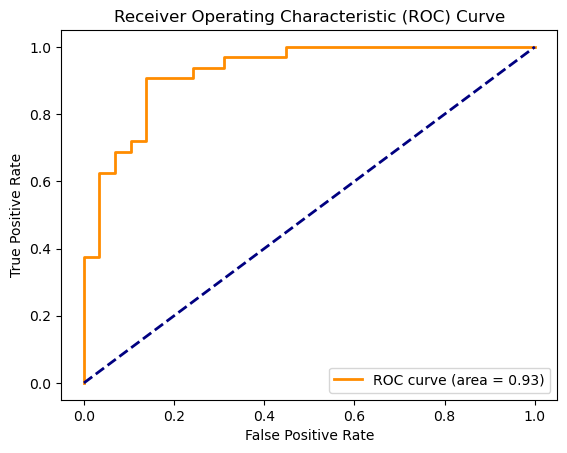

In [53]:
# ROC Curve and calculation AUC metric
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming gs_log_reg is your fitted GridSearchCV model
y_score = gs_log_reg.decision_function(X_test)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [54]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 4 28]]


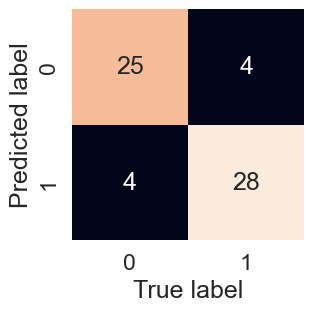

In [55]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [56]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### Calculate evaluation metrics using cross-validation
**cross_val_score()**

In [57]:
# best hyperparameters
gs_log_reg.best_params_

{'C': 4, 'solver': 'liblinear'}

In [58]:
# new classsifier with best parameters
clf = LogisticRegression(C=4,
                       solver="liblinear")

In [59]:
# cross-validated accuracy
cv_acc = cross_val_score(clf,X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.86885246, 0.85245902, 0.86666667, 0.71666667])

In [60]:
# cross-validation precision
cv_precision = cross_val_score(clf, X,y,cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8188009641520078

In [61]:
# cross-validation recall
cv_recall = cross_val_score(clf, X,y,cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8787878787878787

In [62]:
# cross-validation f1-score
cv_f1 = cross_val_score(clf, X,y,cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8464039460644465

<Axes: title={'center': 'Cross-validated classification metrics'}>

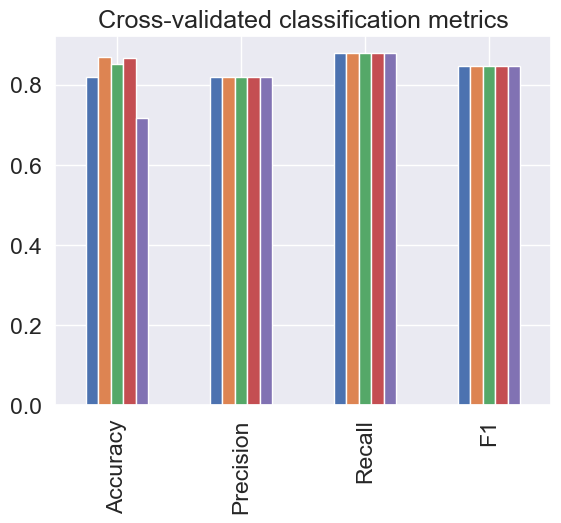

In [63]:
# Visual Representation
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_precision,
    "Recall": cv_recall,
    "F1": cv_f1
})

cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False)


### Feature Importance
analysis of modules for best contribution

LogicRegression model

In [64]:
# fitting an instance of Logistic Regression
clf = LogisticRegression(C=0.2043359,
                        solver = "liblinear")

clf.fit(X_train, y_train)

LogisticRegression(C=0.2043359, solver='liblinear')

In [65]:
# check coef_
clf.coef_

array([[ 0.00316728, -0.86044666,  0.66067025, -0.01156993, -0.00166375,
         0.04386098,  0.31275864,  0.02459362, -0.60413089, -0.56862784,
         0.45051628, -0.63609906, -0.67663368]])

In [66]:
# Match coef's of features to columns
feat_dict = dict(zip(df.columns,list(clf.coef_[0])))
feat_dict

{'age': 0.0031672819550314086,
 'sex': -0.8604466617396942,
 'cp': 0.6606702544647339,
 'trestbps': -0.011569932031281012,
 'chol': -0.001663745263830542,
 'fbs': 0.04386097716862402,
 'restecg': 0.3127586369835613,
 'thalach': 0.02459361535806549,
 'exang': -0.6041308942476562,
 'oldpeak': -0.5686278422096082,
 'slope': 0.4505162758149992,
 'ca': -0.6360990554871792,
 'thal': -0.6766336778922007}

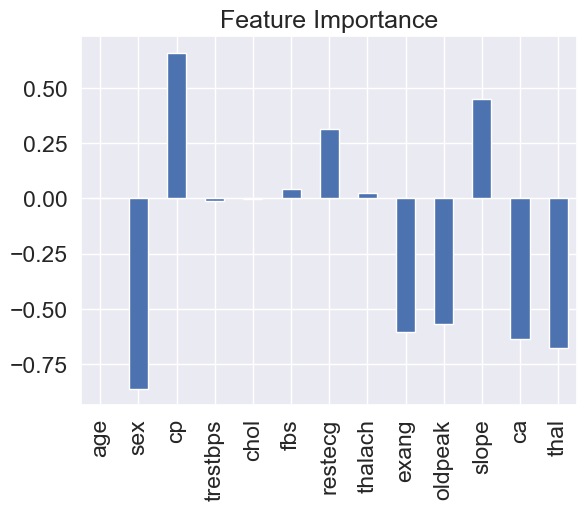

In [67]:
# Visualize
feature_df = pd.DataFrame(feat_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

slope- the slope of the peak exercise ST segment
* 0: Unslopping: better heart rate with exercise(uncommon)
* 1: Flatslopping: minimal change(typical heart rate)        
* 2: Downslopins: signs of unhealthy heart

## 6. Experimentations